Анализ поведения покупателей и повторных закупок InstaCart (InstaCart Online Grocery Basket Analysis Dataset)

Автор: Милютина Дарья Сергеевна

Цель: изучить пользовательские сценарии: в какое время пользователи заказывают товары, как формируется корзина, как меняется активность между заказами и какие категории стимулируют возвращаемость

In [2]:
#импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [3]:
#настройки отображения
pd.set_option('display.max_columns', 50)
plt.rcParams['figure.figsize'] = (10, 5)

print("Библиотеки успешно загружены.")

Библиотеки успешно загружены.


In [4]:
#загрузка и предварительная обработка данных
path = "../money money/"
aisles = pd.read_csv(path + "aisles.csv")
departments = pd.read_csv(path + "departments.csv")
products = pd.read_csv(path + "products.csv")
orders = pd.read_csv(path + "orders.csv")
order_products_prior = pd.read_csv(path + "order_products__prior.csv")
order_products_train = pd.read_csv(path + "order_products__train.csv")

print("Все файлы успешно загружены.")

Все файлы успешно загружены.


In [5]:
 #проверка структуры таблиц
datasets = {
    "aisles": aisles,
    "departments": departments,
    "products": products,
    "orders": orders,
    "order_products_prior": order_products_prior,
    "order_products_train": order_products_train}

for name, df in datasets.items():
    print(f"\n{name.upper()}")
    print("Форма:", df.shape)
    display(df.head())


AISLES
Форма: (134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation



DEPARTMENTS
Форма: (21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol



PRODUCTS
Форма: (49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13



ORDERS
Форма: (3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0



ORDER_PRODUCTS_PRIOR
Форма: (32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0



ORDER_PRODUCTS_TRAIN
Форма: (1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [6]:
#объединяем товары с заказами и справочниками 
order_products = pd.concat(
    [order_products_prior, order_products_train],
    ignore_index = True)

print("Форма объединённой таблицы", order_products.shape)
display(order_products.head())

Форма объединённой таблицы (33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
# Добавляем информацию о заказах
orders_full = order_products.merge(
    orders,
    on = 'order_id',
    how = 'left')

# Добавляем информацию о товарах
orders_full = orders_full.merge(
    products,
    on = 'product_id',
    how = 'left')

# Добавляем departments
orders_full = orders_full.merge(
    departments,
    on = 'department_id',
    how = 'left')

# Добавляем aisles
orders_full = orders_full.merge(
    aisles,
    on = 'aisle_id',
    how = 'left')

display(orders_full.head())

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,dairy eggs,eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,produce,fresh vegetables
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,pantry,spices seasonings
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,pantry,oils vinegars
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,pantry,baking ingredients


In [8]:
#проверям типы данных и пропуски
print("Размер orders_full:", orders_full.shape)

print("Типы данных:")
display(orders_full.dtypes)

print("Количество пропусков по столбцам:")
display(orders_full.isna().sum())

Размер orders_full: (33819106, 15)
Типы данных:


order_id                    int64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
product_name               object
aisle_id                    int64
department_id               int64
department                 object
aisle                      object
dtype: object

Количество пропусков по столбцам:


order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
product_name                    0
aisle_id                        0
department_id                   0
department                      0
aisle                           0
dtype: int64

In [9]:
#не удаляем/меняем столбец days_since_prior_order так как пропуски обозначаюют пользователей, которые сделали свой первый заказ

In [10]:
#основная статистика по ключевым колонкам
print("Уникальные пользователи:", orders_full['user_id'].nunique())
print("Уникальные товары:", orders_full['product_id'].nunique())
print("Уникальные заказы:", orders_full['order_id'].nunique())
print("Уникальные отделы:", orders_full['department'].nunique())
print("Уникальные категории (aisles):", orders_full['aisle'].nunique())

Уникальные пользователи: 206209
Уникальные товары: 49685
Уникальные заказы: 3346083
Уникальные отделы: 21
Уникальные категории (aisles): 134


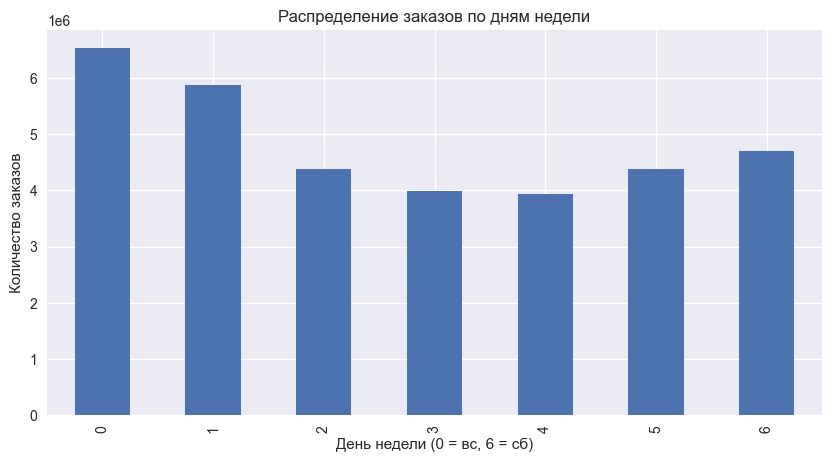

In [11]:
#популярность дней недели
orders_full['order_dow'].value_counts().sort_index().plot(kind = 'bar')
plt.title("Распределение заказов по дням недели")
plt.xlabel("День недели (0 = вс, 6 = сб)")
plt.ylabel("Количество заказов")
plt.show()

распределение заказов по дням недели показывает выраженную недельную динамику, наибольшая активность пользователей приходится на выходные и конец недели.
Пики наблюдаются в районе дня 0 (воскресенье) и дня 1–2 (понедельник–вторник)

модель является типичной дл магазина продуктов, так как на выходных пользователи делают крупные закупки на неделю, в начале рабочей недели происходит дозаказ необходимых товаров

самые низкие значения заказов - в середине недели, когда покупательская активность традиционно падает

такой паттерн говорит о том, что спрос Instacart цикличен и легко прогнозируется по неделям

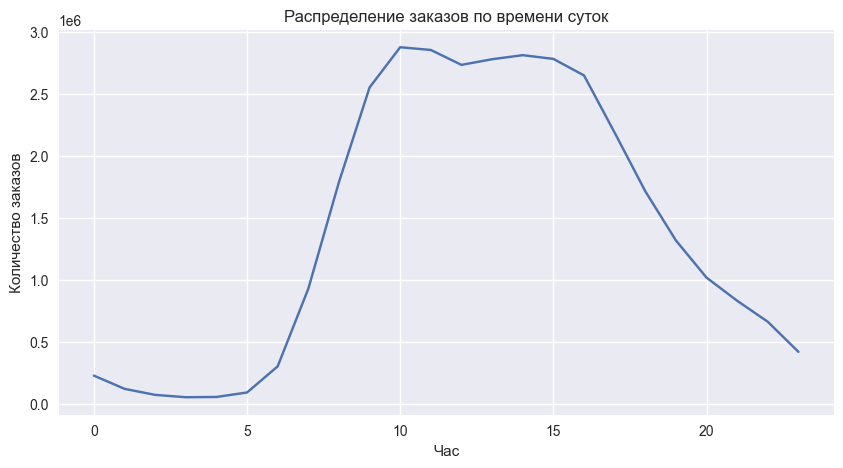

In [12]:
#популярность по времени суток
orders_full['order_hour_of_day'].value_counts().sort_index().plot(kind='line')
plt.title("Распределение заказов по времени суток")
plt.xlabel("Час")
plt.ylabel("Количество заказов")
plt.show()

данный график показывает ярко выраженные пики активности:
утренний пик: 9:00-11:00
вечерний пик: 16:00-18:00

утром люди заказывают продукты на день
вечером - после работы, когда планируют ужин или закупаются домой

минимальная активность приходится на ночь, что также ожидаемо

хорошим решением будет максимизировать доступность курьеров в утренние и вечерние часы

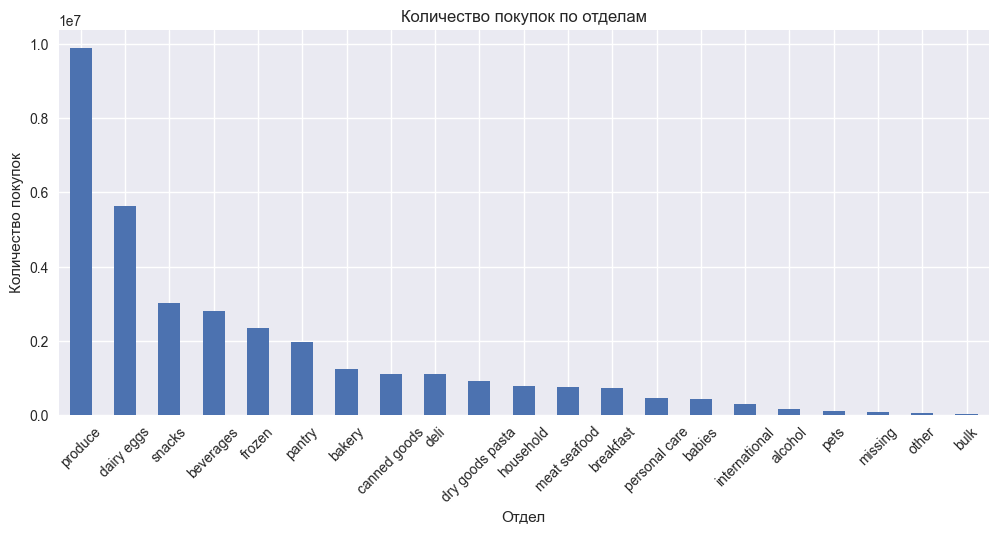

In [13]:
#считаем количество покупок по каждому отделу
dept_counts = orders_full['department'].value_counts().sort_values(ascending = False)

#строим график
dept_counts.plot(kind = 'bar', figsize = (12, 5))
plt.title("Количество покупок по отделам")
plt.xlabel("Отдел")
plt.ylabel("Количество покупок")
plt.xticks(rotation = 45)
plt.show()

топовыми категориями товаров являются овощи и фрукты, молочные продукты и яйца, снеки

это некий фундамент продуктового спроса

овощи и фрукты - обязательная часть большинства покупок

молочная продукция - товары частого повторения

снеки - товары импульсного спроса, но покупаются регулярно

такой паттерн характерен для любого продуктового магазина:
свежие и молочные категории формируют ядро продаж

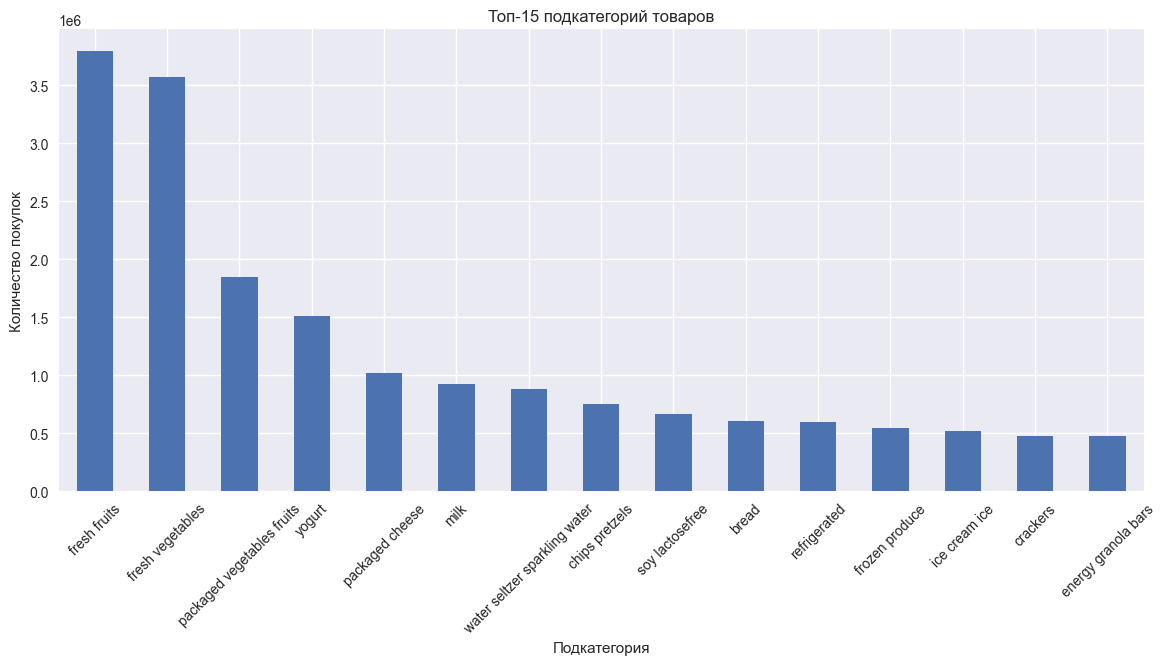

In [14]:
#популярность aisles (подкатегорий)
aisle_counts = orders_full['aisle'].value_counts().sort_values(ascending = False)

#строим график
aisle_counts.head(15).plot(kind = 'bar', figsize = (14, 6))
plt.title("Топ-15 подкатегорий товаров")
plt.xlabel("Подкатегория")
plt.ylabel("Количество покупок")
plt.xticks(rotation = 45)
plt.show()

больше всего покупают товары из подкатегорий: Fresh Vegetables, Fresh Fruits, Yogurt, Packaged Cheese, Milk

то есть Instacart - это сервис с сильным уклоном в ежедневную продуктовую корзину
органика, свежие овощи, фрукты и молочные товары - основа большинства заказов

это подтверждает высокую частоту повторных покупок из этих категорий и важность поддержания высокого качества свежих продуктов в ассортименте

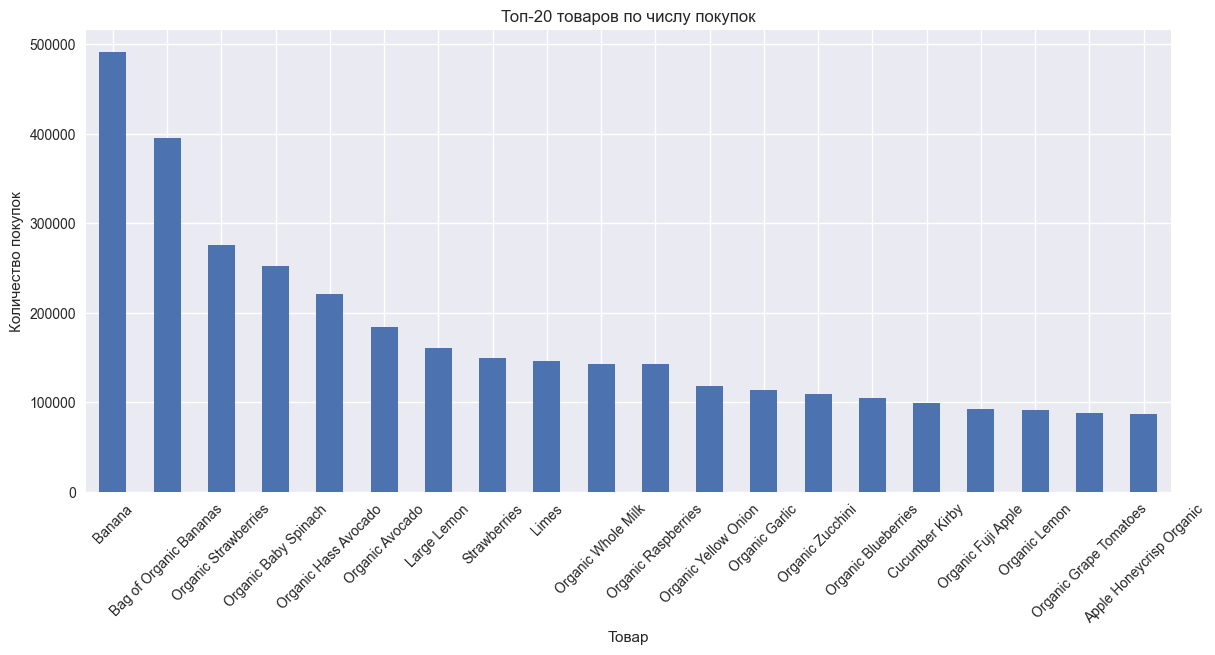

In [15]:
#группируем по product_name и считаем, сколько раз каждый товар покупали
top_products = (
    orders_full['product_name']
    .value_counts()
    .sort_values(ascending = False))

#строим график
top_products.head(20).plot(kind = 'bar', figsize = (14, 6))
plt.title("Топ-20 товаров по числу покупок")
plt.xlabel("Товар")
plt.ylabel("Количество покупок")
plt.xticks(rotation = 45)
plt.show()

в топ-товары Instacart стабильно входят: банан, упаковка органических бананов, клубника, органический авокадо сорта Хасс, крупные яйца, цельное молоко

эти позиции - обязательные товары каждой корзины.

высокая покупаемость объясняется: универсальностью товара, ежедневным потреблением, простотой принятия решения, высокой частотой повторений

для бизнеса эти товары являются трафик-драйверами: их наличие и качество напрямую влияет на удержание пользователей

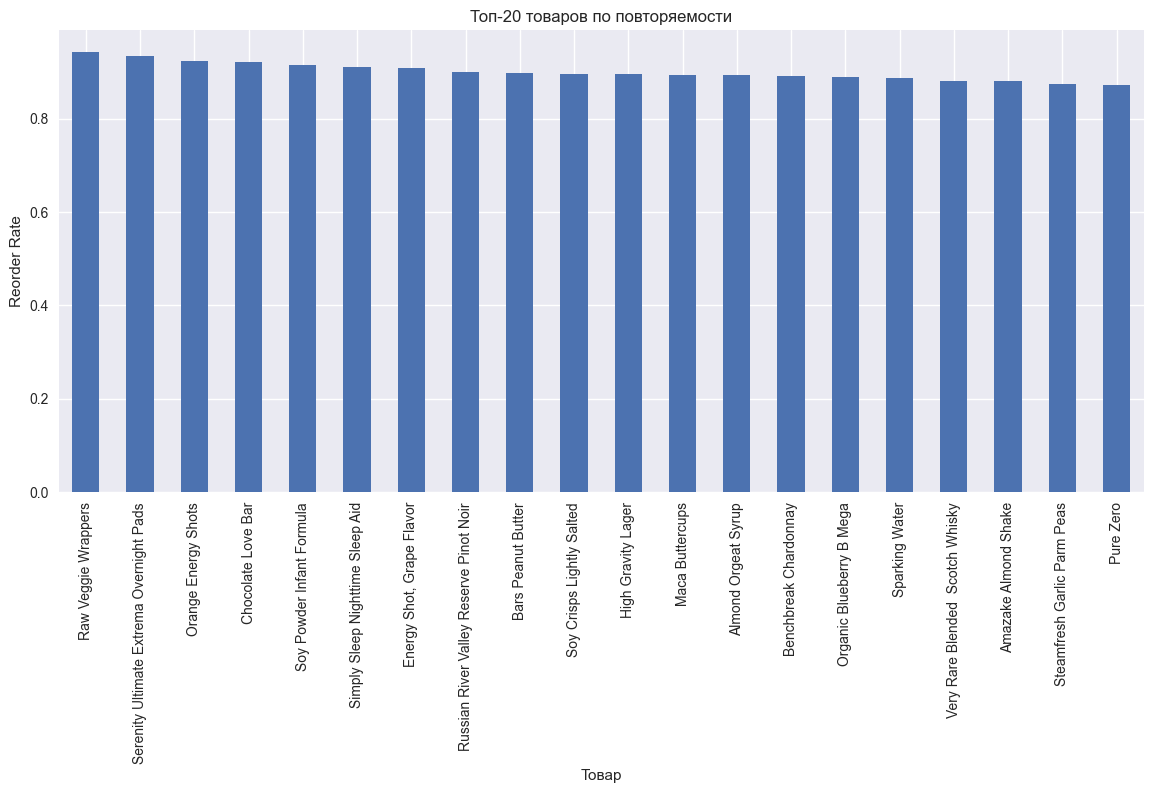

In [16]:
#считаем reorder rate для каждого товара
reorder_rates = (
    orders_full.groupby('product_name')['reordered']
    .mean()
    .sort_values(ascending = False))

#строим график
reorder_rates.head(20).plot(kind = 'bar', figsize = (14,6))
plt.title("Топ-20 товаров по повторяемости")
plt.xlabel("Товар")
plt.ylabel("Reorder Rate")
plt.xticks(rotation = 90)
plt.show()

в список товаров с максимальным уровнем повторных покупок входят позиции с повседневным использованием

высокий reorder rate (>70-80%) означает, что товар стабильно покупается одними и теми же пользователями и формирует лояльность к сервису

и наоборот, товары с низким reorder rate: редкие покупки, сезонные продукты, товары на один раз, специализированные позиции

это помогает понимать, какие товары создают стабильный спрос, а какие лишь одноразовый оборот

Всего пользователей: 206209
Среднее число заказов на пользователя: 16.226658390273947
Медианное число заказов на пользователя: 10.0


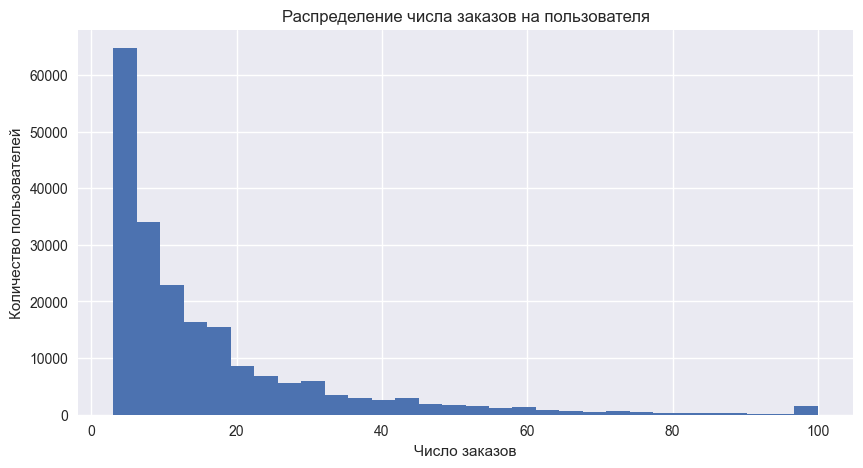

In [17]:
#теперь рассмотрим поведение пользователей
#распределение числа заказов на пользователя

user_orders = (
    orders_full
    .groupby('user_id')['order_id']
    .nunique())

print("Всего пользователей:", user_orders.shape[0])
print("Среднее число заказов на пользователя:", user_orders.mean())
print("Медианное число заказов на пользователя:", user_orders.median())

#строим график
user_orders.plot(kind='hist', bins=30)
plt.title("Распределение числа заказов на пользователя")
plt.xlabel("Число заказов")
plt.ylabel("Количество пользователей")
plt.show()

большинство пользователей совершает ограниченное число заказов, но есть длинный хвост активных покупателей, которые делают десятки заказов

распределение имеет характер "long tail": много пользователей с 1-5 заказами, небольшой процент пользователей составляет ядро активности (10+ заказов)

это является типичной структурой клиентской базы любого e-commerce сервиса

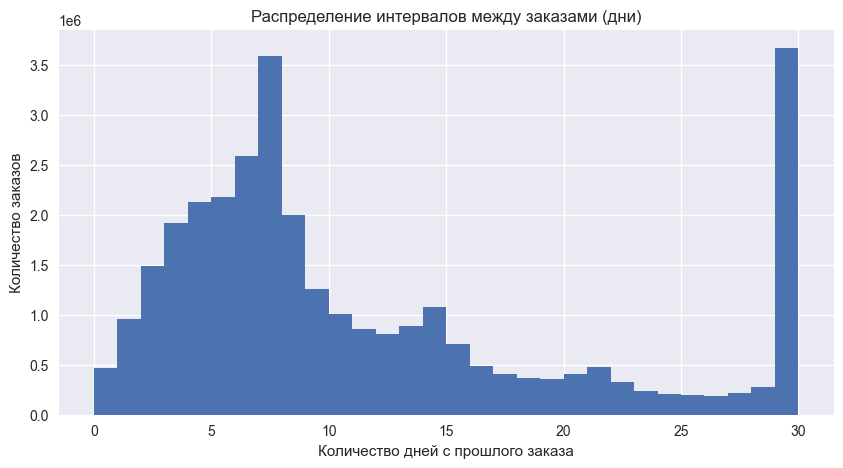

In [18]:
#интервалы между заказами (только не первые заказы)

intervals = orders_full['days_since_prior_order'].dropna()

intervals.plot(kind = 'hist', bins = 30)
plt.title("Распределение интервалов между заказами (дни)")
plt.xlabel("Количество дней с прошлого заказа")
plt.ylabel("Количество заказов")
plt.show()

на гистограмме можем заметить, что большим пиком являются интервалы 3-7 дней, также выражены интервалы 1-2 дня (частые пользователи), около 30 дней - пользователи ежемесячных заказов

Средний размер корзины: 10.10707325550502
Медианный размер корзины: 8.0


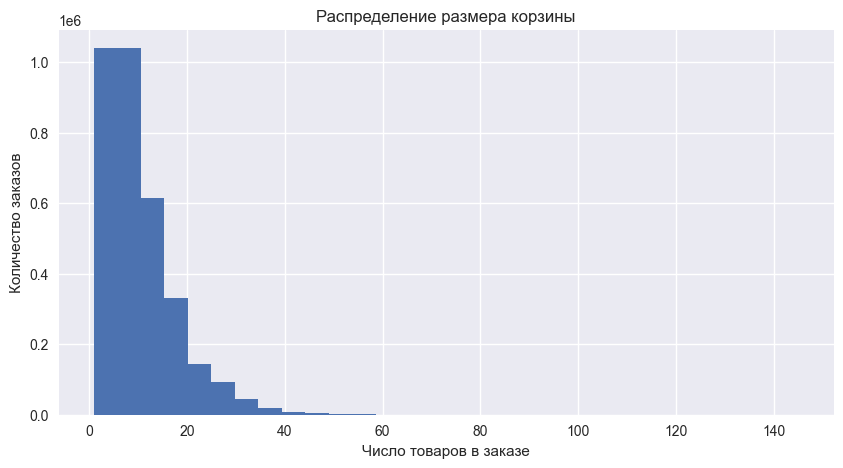

In [19]:
#размер корзины (число товаров в заказе)

basket_size = (
    orders_full
    .groupby('order_id')['product_id']
    .count())

print("Средний размер корзины:", basket_size.mean())
print("Медианный размер корзины:", basket_size.median())

basket_size.plot(kind = 'hist', bins = 30)
plt.title("Распределение размера корзины")
plt.xlabel("Число товаров в заказе")
plt.ylabel("Количество заказов")
plt.show()

размер корзины распределён неравномерно:

медианная корзина содержит 6-8 товаров,

средняя чуть выше из-за крупных корзин активных пользователей,

встречаются корзины и на 30+ товаров (большие закупки)



это показывает два сценария поведения:

маленькие корзины - регулярные небольшие покупки (вечерние/ежедневные)

большие корзины - закупки на неделю или на семью

Выводы и рекомендации: 

На основе проведённого анализа данных Instacart можно сформулировать несколько практических рекомендаций, направленных на улучшение качества сервиса, увеличение повторных покупок и повышение лояльности пользователей.

Прежде всего, стоит усилить внимание к ключевым товарным категориям - свежим овощам и фруктам, молочным продуктам, яйцам и йогуртам. Эти категории формируют основу регулярного спроса, обладают самым высоким уровнем повторяемости и напрямую влияют на удержание пользователей. Расширение ассортимента, повышение качества фреш-категорий и оперативное пополнение запасов помогут увеличить возвратную аудиторию и общую частоту заказов.

Ярко выраженная временная динамика заказов (утренние и вечерние пики) указывает на необходимость перераспределения логистических ресурсов. Укрепление курьерского состава и оптимизация слотов доставки в эти часы позволят уменьшить время ожидания и повысить конверсию в оформленный заказ.

Пользователи Instacart делятся на несколько сегментов по частоте покупок: ежедневные, еженедельные и редкие покупатели. Для каждого сегмента стоит применять персонализированные промоакции: частым пользователям предлагать скидки на свежие товары и органику, еженедельным - тематические промопредложения, а редких пользователей стимулировать реактивационными скидками. Это позволит повысить LTV и сократить отток.

Товары с высоким уровнем повторяемости стоит продвигать через блоки «ваши регулярные товары» или «часто покупают». Товары с низким reorder rate рекомендуется проанализировать и рассмотреть сокращение ассортимента или вынести их в отдельную категорию малопопулярных, чтобы не загромождать выбор и уменьшить складские издержки.

Также рекомендуется усилить промоактивность в середине недели - в дни с минимальной покупательской активностью. Специальные предложения, скидки и тематические подборки (например, «среда свежести» или акции перед выходными) могут выровнять недельную динамику и увеличить общее число заказов.

Наконец, важно учитывать различия в структуре корзин: небольшие корзины требуют быстрой доставки, а большие - стимулов к завершению заказа, например, скидок на доставку или выгодных предложений по крупным категориям. Использование персонализированных рекомендаций и сопутствующих товаров позволит дополнительно увеличить средний чек.


In [ ]:
#далее я хочу показать как я работаю с SQL и Power BI (результаты в отдельных файлах)
#для начала выбираем только нужные столбцы для SQL и Power BI

fact_orders = orders_full[[
    'order_id',
    'user_id',
    'product_id',
    'order_number',
    'order_dow',
    'order_hour_of_day',
    'days_since_prior_order',
    'reordered',
    'product_name',
    'department',
    'aisle']]

fact_orders.shape

(33819106, 11)

In [21]:
#теперь выбираем случайные 300000 строк чтобы файл не был слишком тяжёлый)
fact_sample = fact_orders.sample(300_000, random_state = 42)
fact_sample.shape

(300000, 11)

In [22]:
fact_sample.to_csv("../money money/fact_orders_sample.csv", index = False)